In [1]:
from app.face_reconstruction import FaceReconstructor

reconstructor = FaceReconstructor(root_dir="..", models_dir="../models", device="cuda")

/home/werserk/PycharmProjects/biometrics-hack/venv/lib/python3.11/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/home/werserk/PycharmProjects/biometrics-hack/venv/lib/python3.11/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/home/werserk/PycharmProjects/biometrics-hack/venv/lib/python3.11/site-packages/diffusers/utils/outputs.py:63: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ../models/antelopev2/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ../models/antelopev2/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ../models/antelopev2/arcface.onnx recognition ['None', 3, 112, 112] 127.5 127.5
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ../models/antelopev2/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ../models/antelopev2/scrfd_10g_bnkps.onnx detection [1, 3, '?', '?'] 127.5 128.0
set det-size: (640, 640)


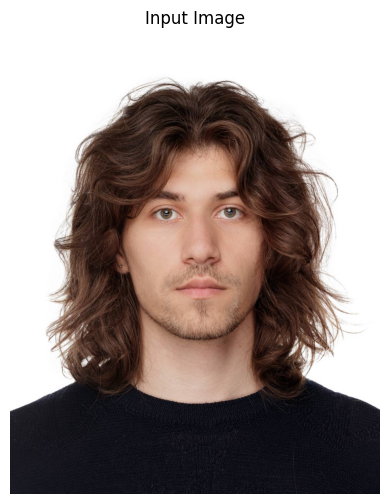

In [3]:
from matplotlib import pyplot as plt
import cv2

test_image_path = "../assets/examples/max.jpg"
test_image = cv2.imread(test_image_path)

plt.figure(figsize=(6, 6))
plt.imshow(test_image[:, :, ::-1])
plt.axis("off")
plt.title("Input Image")
plt.show()

  0%|          | 0/25 [00:00<?, ?it/s]

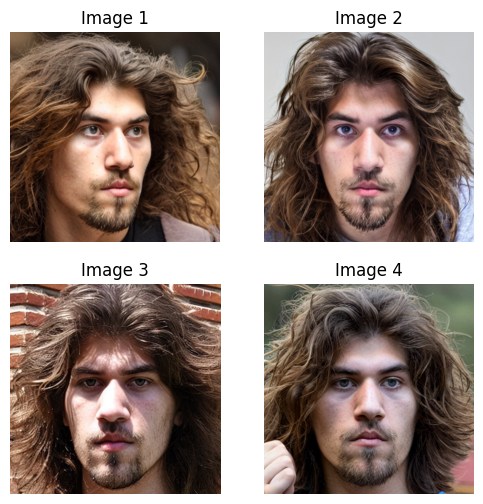

In [13]:
test_embedding = reconstructor.image2embedding(test_image)
test_embedding = reconstructor.prepare_id_embedding(test_embedding)
images = reconstructor.generate_images_by_embedding(test_embedding, num_images=4)

plt.subplots(2, 2, figsize=(6, 6))
for i in range(len(images)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(f"Image {i + 1}")
plt.show()

In [14]:
from app.metric import Similarity

metric = Similarity(model=reconstructor.model)
for image in images:
    metric_value = metric(image, test_image)
    print(f"Cosine similarity: {metric_value}")

Cosine similarity: 0.7964974641799927
Cosine similarity: 0.8073289394378662
Cosine similarity: 0.8064648509025574
Cosine similarity: 0.7999800443649292
